In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import os
from bioreaction.misc.misc import load_json_as_dict
import matplotlib.pyplot as plt
import numpy as np

dir_src = 'data/simulate_circuits/2025_09_19__13_27_25'
ys = np.load( os.path.join(dir_src, 'ys.npy') )
ts = np.load( os.path.join(dir_src, 'ts.npy') )
tabulated_mutation_info = load_json_as_dict( os.path.join(dir_src, 'tabulated_mutation_info.json') )
analytics = load_json_as_dict( os.path.join(dir_src, 'analytics.json') )

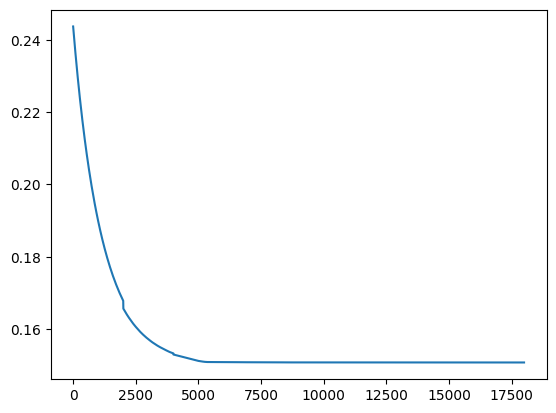

In [27]:
tmax = len(ts) // 1
plt.plot(ts[:tmax], ys[8,:tmax,-1])

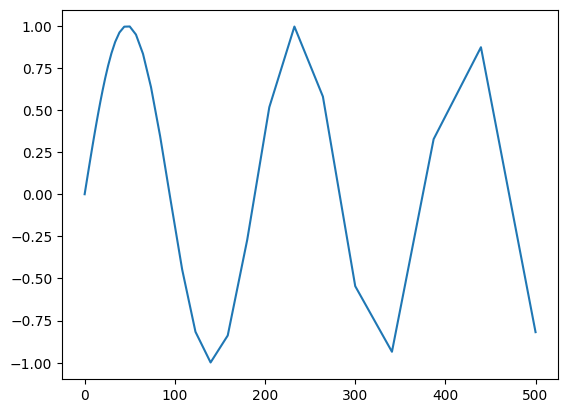

In [24]:
import matplotlib.pyplot as plt
import numpy as np

np.logspace(0.0001, 1.5, 10, base=10, endpoint=True) 
save_steps = 50
t0=0
t1=500
save_steps = np.logspace(np.log10(t0 + 1), np.log10(t1), save_steps, base=10, endpoint=True) - 1.
save_steps[-1] = t1

plt.plot(save_steps, np.sin(save_steps/30))

In [29]:
np.dot(5, 5)

np.int64(25)

In [ ]:
# import os
# import numpy as np
# from evoscaper.utils.evolution import calculate_ruggedness_core
# from synbio_morpher.utils.data.data_format_tools.common import load_json_as_dict

# analytics_perturbed = load_json_as_dict('data/ruggedness/2025_07_01__10_26_40/batch_0/analytics.json')
# analytics_original = None
# analytic = 'Log sensitivity'
# resimulate_analytics = True
# n_samples = 2
# eps = np.load('data/ruggedness/2025_07_01__10_26_40/batch_0/eps.npy')
# n_perturbs = eps.shape[1] + resimulate_analytics

# ruggedness = calculate_ruggedness_core(analytics_perturbed, analytics_original, analytic,
#                                         resimulate_analytics, n_samples, n_perturbs, eps)
# top_write_dir_batch = 'data/ruggedness/2025_07_01__10_26_40/batch_0'
# for k, ii in zip(['ruggedness.npy'], [ruggedness]):
#     np.save(os.path.join(top_write_dir_batch, k), ii)


(2, 100000, 6)


/tmp/ipykernel_3593799/2854483422.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


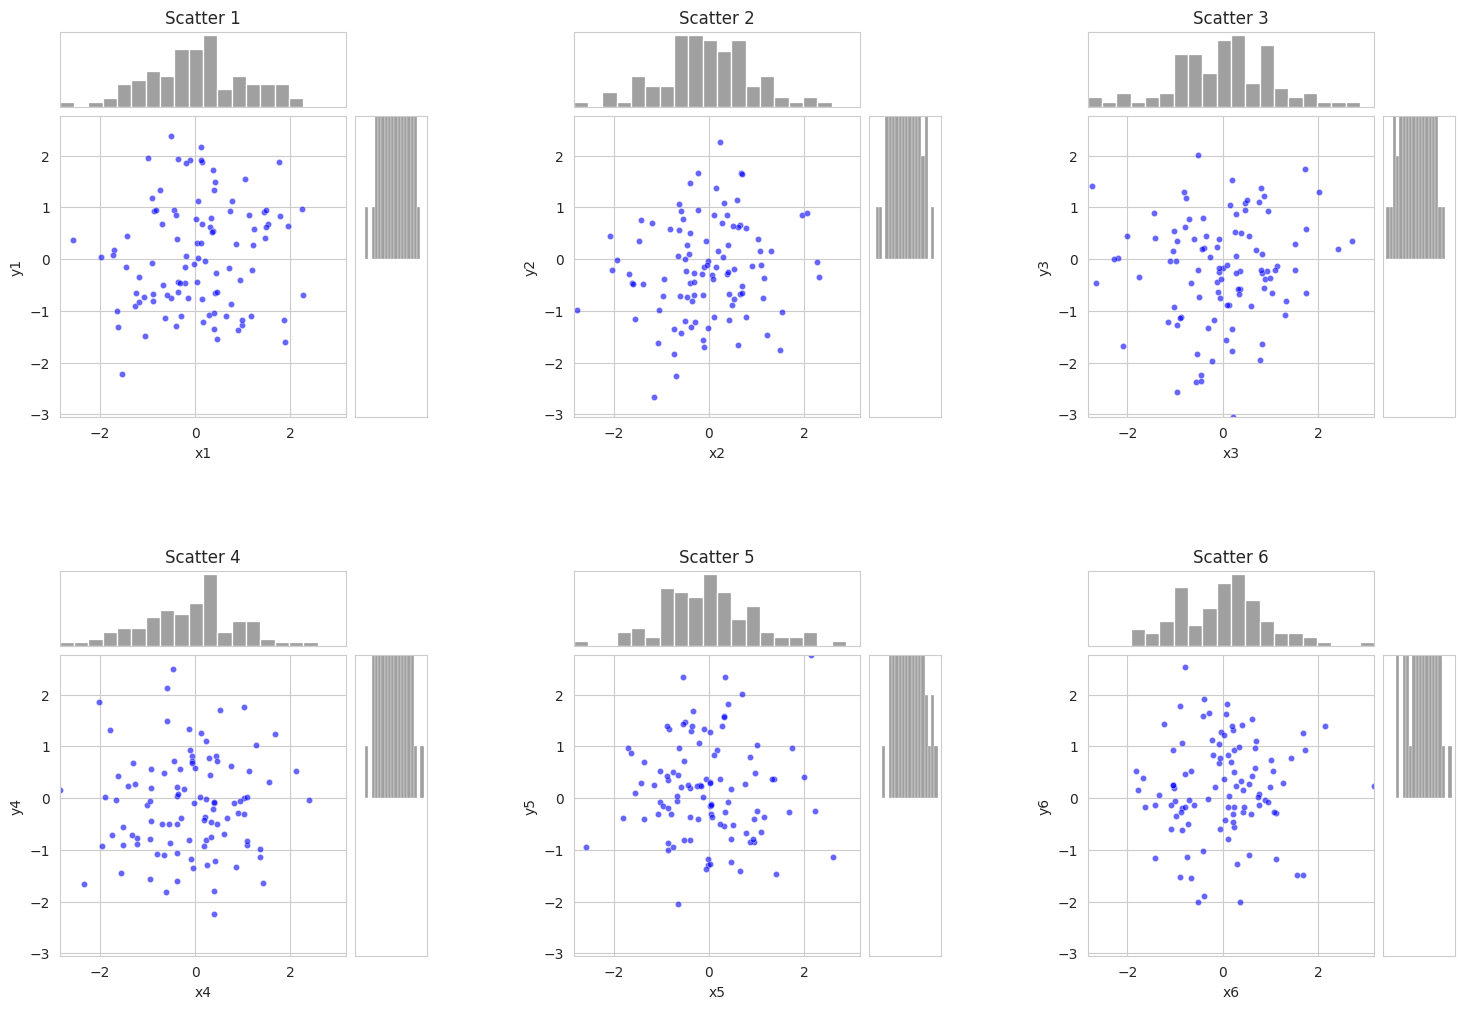

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

# Example data
np.random.seed(0)
df = pd.DataFrame({
    'x1': np.random.randn(100),
    'y1': np.random.randn(100),
    'x2': np.random.randn(100),
    'y2': np.random.randn(100),
    'x3': np.random.randn(100),
    'y3': np.random.randn(100),
    'x4': np.random.randn(100),
    'y4': np.random.randn(100),
    'x5': np.random.randn(100),
    'y5': np.random.randn(100),
    'x6': np.random.randn(100),
    'y6': np.random.randn(100),
})

# Find global axis limits
all_x = pd.concat([df[f'x{i+1}'] for i in range(6)])
all_y = pd.concat([df[f'y{i+1}'] for i in range(6)])
x_min, x_max = all_x.min(), all_x.max()
y_min, y_max = all_y.min(), all_y.max()

# Setup figure
fig = plt.figure(figsize=(18, 12))
outer = gridspec.GridSpec(2, 3, wspace=0.4, hspace=0.4)

for i in range(6):
    inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                                             subplot_spec=outer[i],
                                             width_ratios=[4, 1],
                                             height_ratios=[1, 4],
                                             wspace=0.05, hspace=0.05)
    
    x = df[f'x{i+1}']
    y = df[f'y{i+1}']
    
    # Top x-histogram
    ax_xhist = plt.Subplot(fig, inner[0, 0])
    sns.histplot(x, ax=ax_xhist, bins=20, color='gray', binrange=(x_min, x_max))
    ax_xhist.set_xlim(x_min, x_max)
    ax_xhist.set_xticks([])
    ax_xhist.set_yticks([])
    ax_xhist.set_xlabel('')
    ax_xhist.set_ylabel('')
    ax_xhist.set_title(f'Scatter {i+1}')
    fig.add_subplot(ax_xhist)
    
    # Right y-histogram
    ax_yhist = plt.Subplot(fig, inner[1, 1])
    sns.histplot(y, ax=ax_yhist, bins=20, color='gray', orientation='horizontal', binrange=(y_min, y_max))
    ax_yhist.set_ylim(y_min, y_max)
    ax_yhist.set_xticks([])
    ax_yhist.set_yticks([])
    ax_yhist.set_xlabel('')
    ax_yhist.set_ylabel('')
    fig.add_subplot(ax_yhist)
    
    # Main scatterplot
    ax_scatter = plt.Subplot(fig, inner[1, 0])
    sns.scatterplot(x=x, y=y, ax=ax_scatter, s=20, color='blue', alpha=0.6)
    ax_scatter.set_xlim(x_min, x_max)
    ax_scatter.set_ylim(y_min, y_max)
    ax_scatter.set_xlabel(f'x{i+1}')
    ax_scatter.set_ylabel(f'y{i+1}')
    fig.add_subplot(ax_scatter)

plt.tight_layout()
plt.show()


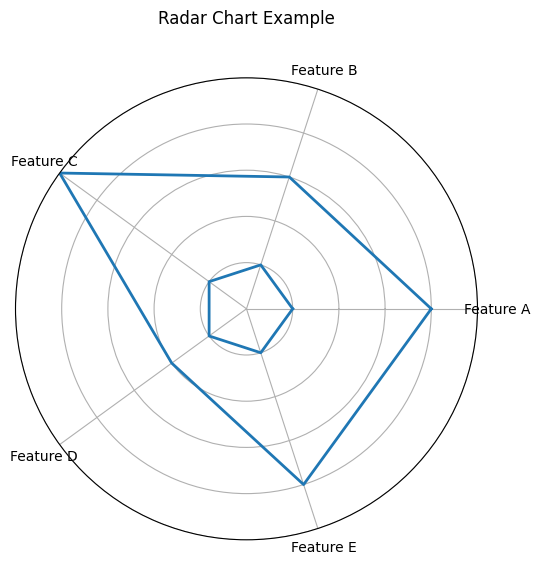

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame with 5 features
df = pd.DataFrame({
    'Feature A': [4, 1],
    'Feature B': [3, 1],
    'Feature C': [5, 1],
    'Feature D': [2, 1],
    'Feature E': [4, 1]
})

def plot_radar_chart(df, i, ax):
    """
    Plots a radar chart for the given DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data to plot.
    """
    # Step 1: Prepare data
    categories = df.columns.tolist()
    values = df.iloc[i].tolist()
    values += values[:1]  # repeat first value to close the circle

    # Step 2: Calculate angles for each axis
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Step 3: Create radar chart
    ax.plot(angles, values, color='tab:blue', linewidth=2)
    # ax.fill(angles, values, color='tab:blue', alpha=0.25)

    # Step 4: Set labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_yticklabels([])  # hide radial ticks for cleaner look

    # Optional: Set range for radial axis
    ax.set_ylim(0, 5)

    plt.title("Radar Chart Example", y=1.1)
    # plt.show()
    
    
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i in range(len(df)):
    plot_radar_chart(df, i, ax)


Data shape: (60000, 784), Labels shape: (60000,)
Epoch: 0, Loss: 173.5459
Epoch: 1, Loss: 126.0963
Epoch: 2, Loss: 117.1771
Epoch: 3, Loss: 113.5439
Epoch: 4, Loss: 111.3360
Subsampling 1000 points from 12000 for GPLVM training
Using PCA initialization for GPLVM
Input data shape: (1000, 20) (samples × dimensions)
Target latent dimension: 2
Using provided initialization with shape: torch.Size([1000, 2])
Using sparse approximation with 100 inducing points
Inducing points shape: torch.Size([100, 2])
Training GPLVM on cuda...


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Iteration 10/500 - Loss: 32.6956
Iteration 20/500 - Loss: 29.9950
Iteration 30/500 - Loss: 28.6127
Iteration 40/500 - Loss: 27.8284
Early stopping at iteration 48 due to no improvement
Latent space shape: (12000, 2)
Test labels shape: (12000,)
Number of visualized points: 12000


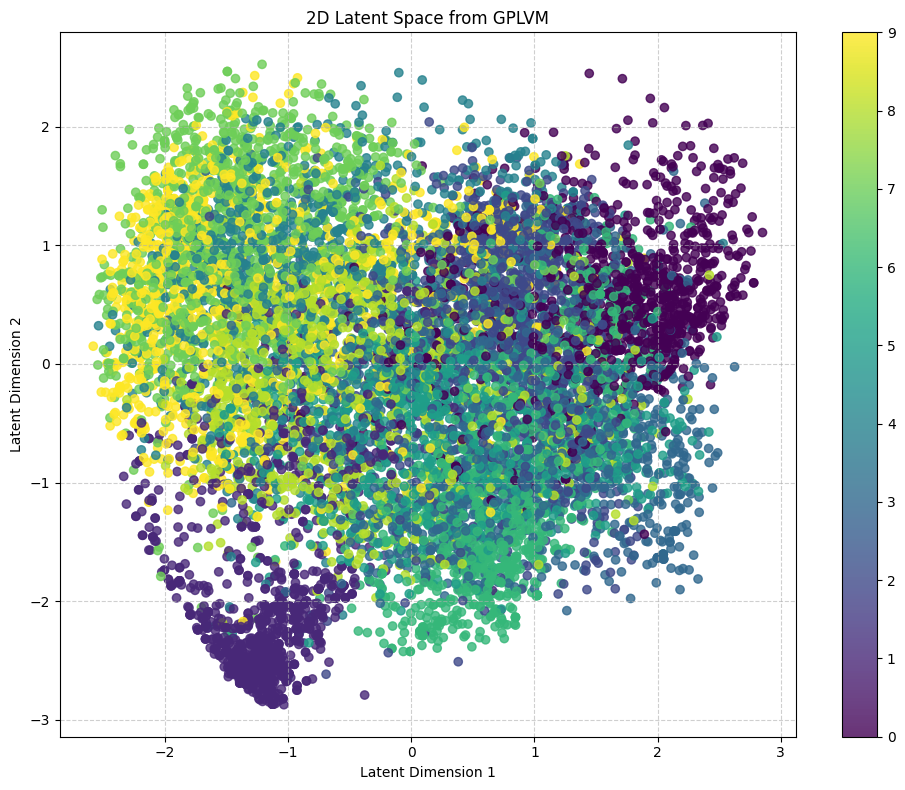

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import gpytorch
from sklearn.model_selection import train_test_split

# First, let's define a simple VAE
class VAE(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=400, latent_dim=20):
        super(VAE, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc21 = nn.Linear(hidden_dim, latent_dim)  # mu
        self.fc22 = nn.Linear(hidden_dim, latent_dim)  # log_var
        
        # Decoder
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, input_dim)
        
    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))
    
    def forward(self, x):
        mu, log_var = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var, z

# Define the loss function for VAE
def loss_function(recon_x, x, mu, log_var):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

# Now, let's define our GPLVM model using GPyTorch
# Base exact GP model for GPLVM
class ExactGPLVMModel(gpytorch.models.ExactGP):
    def __init__(self, X, Y, kernel='rbf'):
        # X is the latent variable (2D in our case)
        # Y is a single dimension of observed data
        likelihood = gpytorch.likelihoods.GaussianLikelihood()
        super(ExactGPLVMModel, self).__init__(X, Y, likelihood)
        
        # Store input dimension for validation
        self.input_dim = X.shape[1]
        
        self.mean_module = gpytorch.means.ZeroMean()
        
        if kernel == 'rbf':
            base_kernel = gpytorch.kernels.RBFKernel(ard_num_dims=self.input_dim)
            self.covar_module = gpytorch.kernels.ScaleKernel(base_kernel)
        elif kernel == 'matern':
            base_kernel = gpytorch.kernels.MaternKernel(ard_num_dims=self.input_dim)
            self.covar_module = gpytorch.kernels.ScaleKernel(base_kernel)
        else:
            raise ValueError("Kernel must be 'rbf' or 'matern'")
            
    def forward(self, x):
        # Ensure input has the right dimensionality
        if x.shape[1] != self.input_dim:
            raise ValueError(f"Expected input dimension {self.input_dim}, got {x.shape[1]}")
            
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Sparse GP model for GPLVM (for larger datasets)
class SparseGPLVMModel(gpytorch.models.ApproximateGP):
    def __init__(self, X, Y, inducing_points, kernel='rbf'):
        # Store input dimension for validation
        self.input_dim = X.shape[1]
        
        # Use a variational strategy for sparse approximation
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(
            inducing_points.size(0)
        )
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=True
        )
        super(SparseGPLVMModel, self).__init__(variational_strategy)
        
        self.mean_module = gpytorch.means.ZeroMean()
        
        if kernel == 'rbf':
            base_kernel = gpytorch.kernels.RBFKernel(ard_num_dims=self.input_dim)
            self.covar_module = gpytorch.kernels.ScaleKernel(base_kernel)
        elif kernel == 'matern':
            base_kernel = gpytorch.kernels.MaternKernel(ard_num_dims=self.input_dim)
            self.covar_module = gpytorch.kernels.ScaleKernel(base_kernel)
        else:
            raise ValueError("Kernel must be 'rbf' or 'matern'")
            
    def forward(self, x):
        # Ensure input has the right dimensionality
        if x.shape[1] != self.input_dim:
            raise ValueError(f"Expected input dimension {self.input_dim}, got {x.shape[1]}")
            
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)
        
# Multi-output GPLVM with independent models for each dimension
class GPLVM:
    def __init__(self, X, Y, kernel='rbf', sparse=False, inducing_points=None):
        self.X = X
        self.Y = Y
        self.output_dims = Y.shape[1]
        self.models = []
        self.likelihoods = []
        self.sparse = sparse
        self.latent_dim = X.shape[1]  # Store the latent dimension
        
        # Create a separate GP model for each output dimension
        for i in range(self.output_dims):
            if sparse:
                # Use sparse approximation
                if inducing_points is None:
                    raise ValueError("Must provide inducing points for sparse GPLVM")
                
                model = SparseGPLVMModel(X, Y[:, i], inducing_points, kernel)
                likelihood = gpytorch.likelihoods.GaussianLikelihood()
                self.models.append(model)
                self.likelihoods.append(likelihood)
            else:
                # Use exact GP
                model = ExactGPLVMModel(X, Y[:, i], kernel)
                self.models.append(model)
                self.likelihoods.append(model.likelihood)
    
    def parameters(self):
        """Return parameters of all models"""
        params = []
        for model in self.models:
            params.extend(list(model.parameters()))
        for likelihood in self.likelihoods:
            params.extend(list(likelihood.parameters()))
        return params
        
    def to(self, device):
        """Move all models and likelihoods to device"""
        for i in range(len(self.models)):
            self.models[i] = self.models[i].to(device)
            self.likelihoods[i] = self.likelihoods[i].to(device)
        return self
        
    def train(self):
        for model in self.models:
            model.train()
        for likelihood in self.likelihoods:
            likelihood.train()
            
    def eval(self):
        for model in self.models:
            model.eval()
        for likelihood in self.likelihoods:
            likelihood.eval()

# Function to train the VAE model
def train_vae(model, data_loader, epochs=10, device='cpu'):
    optimizer = Adam(model.parameters(), lr=1e-3)
    model.train()
    
    for epoch in range(epochs):
        train_loss = 0
        for batch_idx, (data, _) in enumerate(data_loader):
            data = data.to(device)
            optimizer.zero_grad()
            
            recon_batch, mu, log_var, _ = model(data)
            loss = loss_function(recon_batch, data, mu, log_var)
            
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            
        print(f'Epoch: {epoch}, Loss: {train_loss / len(data_loader.dataset):.4f}')
    
    return model

# Function to extract embeddings from trained VAE
def extract_vae_embeddings(vae_model, data_loader, device='cpu'):
    vae_model.eval()
    embeddings = []
    
    with torch.no_grad():
        for data, _ in data_loader:
            data = data.to(device)
            _, mu, _, _ = vae_model(data)
            embeddings.append(mu.cpu().numpy())
    
    return np.vstack(embeddings)

# Initialize and optimize GPLVM
def train_gplvm(Y, latent_dim=2, learning_rate=0.01, iterations=1000, 
                batch_size=5, patience=5, improvement_threshold=0.01,
                X_init=None):
    """
    Train a GPLVM model with efficiency improvements:
    1. Dimension batching - process multiple output dimensions in each iteration
    2. Early stopping - stop training when loss plateaus
    3. Learning rate scheduling - reduce learning rate when progress slows
    4. Smart initialization - option to use PCA or other initialization
    5. Sparse approximation for larger datasets
    
    Args:
        Y: VAE embeddings (n_samples × n_dimensions)
        latent_dim: Dimensionality of the latent space
        learning_rate: Initial learning rate
        iterations: Maximum number of iterations
        batch_size: Number of output dimensions to process in each batch
        patience: Number of iterations to wait for improvement before early stopping
        improvement_threshold: Minimum relative improvement to reset patience counter
        X_init: Optional initialization for latent points (e.g., from PCA)
    """
    # Initialize latent points (randomly or from provided initialization)
    n_samples = Y.shape[0]
    output_dim = Y.shape[1]
    
    print(f"Input data shape: {Y.shape} (samples × dimensions)")
    print(f"Target latent dimension: {latent_dim}")
    
    if X_init is not None:
        X = X_init.clone().requires_grad_(True)
        print(f"Using provided initialization with shape: {X.shape}")
    else:
        X = torch.randn(n_samples, latent_dim, requires_grad=True)
        print(f"Using random initialization with shape: {X.shape}")
    
    Y_tensor = torch.tensor(Y, dtype=torch.float32)
    
    # Use sparse GP approximation for larger datasets
    use_sparse = n_samples > 500
    inducing_points = None
    
    if use_sparse:
        # If using sparse approximation, select inducing points
        # We'll initialize with K-means centers
        from sklearn.cluster import KMeans
        n_inducing = min(100, n_samples // 5)  # Rule of thumb: 100 or 20% of data
        
        print(f"Using sparse approximation with {n_inducing} inducing points")
        # For inducing points, we need to cluster in the output space (Y)
        # and then initialize them in the same space
        kmeans = KMeans(n_clusters=n_inducing, random_state=0, n_init=3)
        kmeans.fit(Y)
        
        # The inducing points need to be in the latent space (X) dimensionality
        if latent_dim == 2:  # Simple case for 2D latent space
            inducing_X = torch.zeros((n_inducing, latent_dim), dtype=torch.float32)
            # Create a grid of points in 2D space
            grid_size = int(np.ceil(np.sqrt(n_inducing)))
            for i in range(n_inducing):
                row = i // grid_size
                col = i % grid_size
                inducing_X[i, 0] = -1.0 + 2.0 * (col / (grid_size - 1)) if grid_size > 1 else 0
                inducing_X[i, 1] = -1.0 + 2.0 * (row / (grid_size - 1)) if grid_size > 1 else 0
            inducing_points = inducing_X
        else:
            # For higher dimensions, initialize with PCA
            from sklearn.decomposition import PCA
            pca = PCA(n_components=latent_dim)
            # Fit PCA on the cluster centers
            inducing_points = torch.tensor(
                pca.fit_transform(kmeans.cluster_centers_), 
                dtype=torch.float32
            )
        
        print(f"Inducing points shape: {inducing_points.shape}")
    
    # Define GPLVM model with multiple output dimensions
    model = GPLVM(X, Y_tensor, sparse=use_sparse, inducing_points=inducing_points)
    
    # Use the adam optimizer with weight decay (L2 regularization)
    optimizer = torch.optim.Adam([
        {'params': model.parameters()},
        {'params': [X], 'lr': learning_rate * 2}  # Higher learning rate for latent points
    ], lr=learning_rate, weight_decay=1e-4)
    
    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=patience//2, verbose=True
    )
    
    # "Loss" for GPs - the marginal log likelihood
    mlls = [gpytorch.mlls.ExactMarginalLogLikelihood(model.likelihoods[i], model.models[i]) 
            if not use_sparse else 
            gpytorch.mlls.VariationalELBO(model.likelihoods[i], model.models[i], num_data=n_samples)
            for i in range(model.output_dims)]
    
    # Training loop
    model.train()
    
    # For early stopping
    best_loss = float('inf')
    no_improvement_count = 0
    best_X = X.clone().detach()
    
    # Prepare dimension batches
    output_dims = list(range(model.output_dims))
    
    # Use CUDA if available for faster computation
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X = X.to(device)
    Y_tensor = Y_tensor.to(device)
    model.to(device)
    
    print(f"Training GPLVM on {device}...")
    
    for i in range(iterations):
        # Shuffle dimension ordering each epoch for better convergence
        np.random.shuffle(output_dims)
        batches = [output_dims[j:j+batch_size] for j in range(0, len(output_dims), batch_size)]
        
        epoch_loss = 0
        
        for batch_dims in batches:
            optimizer.zero_grad()
            
            # Compute loss for this batch of dimensions
            batch_loss = 0
            for j in batch_dims:
                try:
                    output = model.models[j](X)
                    batch_loss -= mlls[j](output, Y_tensor[:, j])
                except Exception as e:
                    print(f"Error in dimension {j}: {e}")
                    print(f"X shape: {X.shape}")
                    print(f"Y shape: {Y_tensor[:, j].shape}")
                    print(f"Model input dim: {model.latent_dim}")
                    raise
            
            batch_loss.backward()
            optimizer.step()
            epoch_loss += batch_loss.item()
        
        # Track progress
        if (i+1) % 10 == 0:
            print(f'Iteration {i+1}/{iterations} - Loss: {epoch_loss:.4f}')
        
        # Learning rate scheduling
        scheduler.step(epoch_loss)
        
        # Early stopping check
        if epoch_loss < best_loss * (1 - improvement_threshold):
            best_loss = epoch_loss
            no_improvement_count = 0
            best_X = X.clone().detach()
        else:
            no_improvement_count += 1
            
        if no_improvement_count >= patience:
            print(f"Early stopping at iteration {i+1} due to no improvement")
            break
    
    # Return best optimized latent points
    return best_X.cpu().numpy()

# Main function to run the complete pipeline
def vae_gplvm_reduction(data, batch_size=128, vae_epochs=10, gplvm_iterations=1000, 
                       max_gplvm_samples=1000, use_pca_init=True):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Prepare the data
    x_train, x_test = train_test_split(data, test_size=0.2, random_state=42)
    train_loader = DataLoader(
        TensorDataset(torch.FloatTensor(x_train), torch.zeros(len(x_train))),
        batch_size=batch_size, shuffle=True
    )
    test_loader = DataLoader(
        TensorDataset(torch.FloatTensor(x_test), torch.zeros(len(x_test))),
        batch_size=batch_size, shuffle=False
    )
    
    # Define and train VAE
    input_dim = data.shape[1]
    vae = VAE(input_dim=input_dim, hidden_dim=400, latent_dim=20).to(device)
    vae = train_vae(vae, train_loader, epochs=vae_epochs, device=device)
    
    # Extract embeddings from VAE
    embeddings = extract_vae_embeddings(vae, test_loader, device=device)
    
    # Subsample for GPLVM if needed (for efficiency)
    if embeddings.shape[0] > max_gplvm_samples:
        print(f"Subsampling {max_gplvm_samples} points from {embeddings.shape[0]} for GPLVM training")
        indices = np.random.choice(embeddings.shape[0], max_gplvm_samples, replace=False)
        embeddings_subset = embeddings[indices]
    else:
        embeddings_subset = embeddings
    
    # PCA initialization for faster convergence (optional)
    if use_pca_init:
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        latent_init = pca.fit_transform(embeddings_subset)
        print("Using PCA initialization for GPLVM")
        
        # Train GPLVM on VAE embeddings with PCA initialization
        latent_2d_subset = train_gplvm(
            embeddings_subset, 
            latent_dim=2, 
            iterations=gplvm_iterations,
            X_init=torch.tensor(latent_init, dtype=torch.float32)
        )
    else:
        # Train GPLVM on VAE embeddings and reduce to 2D
        latent_2d_subset = train_gplvm(
            embeddings_subset, 
            latent_dim=2, 
            iterations=gplvm_iterations
        )
    
    # If we subsampled, we need to map the remaining points
    if embeddings.shape[0] > max_gplvm_samples:
        # Train a simple model to map from VAE embeddings to GPLVM latent space
        from sklearn.neighbors import KNeighborsRegressor
        knn = KNeighborsRegressor(n_neighbors=5)
        knn.fit(embeddings_subset, latent_2d_subset)
        
        # Map all points
        latent_2d = knn.predict(embeddings)
    else:
        latent_2d = latent_2d_subset
    
    return latent_2d, vae

# Visualization function
def visualize_latent_space(latent_points, labels=None):
    plt.figure(figsize=(10, 8))
    
    if labels is not None:
        # Handle case where labels and latent_points have different lengths
        if len(labels) != len(latent_points):
            print(f"Warning: Labels ({len(labels)}) and latent points ({len(latent_points)}) have different lengths")
            print("Using only the first matching subset of labels")
            
            # Use only the first n labels where n is the length of latent_points
            labels_subset = labels[:len(latent_points)] if len(labels) > len(latent_points) else labels
            
            scatter = plt.scatter(latent_points[:, 0], latent_points[:, 1], c=labels_subset, cmap='viridis', alpha=0.8)
        else:
            scatter = plt.scatter(latent_points[:, 0], latent_points[:, 1], c=labels, cmap='viridis', alpha=0.8)
            
        plt.colorbar(scatter)
    else:
        plt.scatter(latent_points[:, 0], latent_points[:, 1], alpha=0.8)
    
    plt.title('2D Latent Space from GPLVM')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage with MNIST
if __name__ == "__main__":
    # If you have torchvision installed
    from torchvision import datasets, transforms
    
    # Load MNIST dataset
    mnist_data = datasets.MNIST('./data', train=True, download=True,
                             transform=transforms.ToTensor())
    
    # Prepare data
    x = mnist_data.data.float() / 255.0
    x = x.reshape(x.shape[0], -1).numpy()  # Flatten images
    y = mnist_data.targets.numpy()  # Labels for visualization
    
    print(f"Data shape: {x.shape}, Labels shape: {y.shape}")
    
    # Run the pipeline
    latent_2d, vae_model = vae_gplvm_reduction(x, vae_epochs=5, gplvm_iterations=500)
    
    print(f"Latent space shape: {latent_2d.shape}")
    
    # Since we're using train/test split, we need to use only the test labels
    # that correspond to our latent points
    test_size = 0.2
    _, test_indices = train_test_split(
        np.arange(len(y)), test_size=test_size, random_state=42
    )
    test_labels = y[test_indices]
    
    print(f"Test labels shape: {test_labels.shape}")
    print(f"Number of visualized points: {len(latent_2d)}")
    
    # Make sure labels match latent points
    if len(test_labels) > len(latent_2d):
        test_labels = test_labels[:len(latent_2d)]
    elif len(test_labels) < len(latent_2d):
        latent_2d = latent_2d[:len(test_labels)]
        
    # Visualize results
    visualize_latent_space(latent_2d, test_labels)

In [19]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from synbio_morpher.utils.data.data_format_tools.common import load_json_as_dict, write_json
from synbio_morpher.utils.results.analytics.timeseries import compute_step_response_times

# fn = 'data/simulate_circuits/2025_02_11__13_56_51/tabulated_mutation_info.json'
# dir_s = 'data/simulate_circuits/2025_02_01__00_22_38'
dir_s = 'data/simulate_circuits/2025_02_11__13_56_51'
# fn = 'data/simulate_circuits/2025_02_01__00_22_38/tabulated_mutation_info.json'

# d = pd.read_json(fn)

ts = np.load(os.path.join(dir_s, 'ts.npy'))
ys = np.load(os.path.join(dir_s, 'ys.npy'))
config = load_json_as_dict(os.path.join(dir_s, 'config.json'))
analytics = load_json_as_dict(os.path.join(dir_s, 'analytics.json'))
analytics['steady_states'] = np.array(analytics['steady_states'])


In [20]:
data = load_json_as_dict(os.path.join(dir_s, 'tabulated_mutation_info.json'))


In [21]:
import jax
from functools import partial
t_end = len(ts)
idx_c = 12
f_resp = jax.vmap(partial(compute_step_response_times, signal_time=ts[0], t=ts[:t_end]))
r = f_resp(data=np.swapaxes(ys[:, :t_end], -1, -2), steady_states=analytics['steady_states'][..., None])



<Axes: xlabel='response_time', ylabel='Count'>

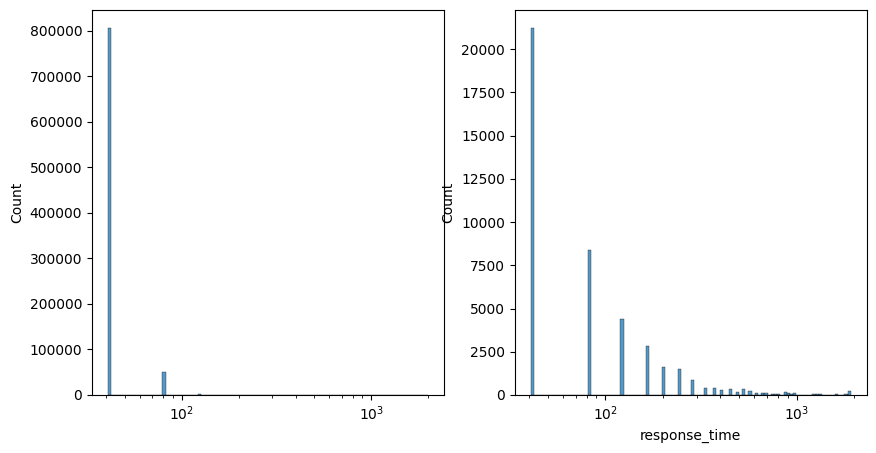

In [22]:
# nshow = int(2e4)
# plt.plot((ts * np.ones_like(ys[:nshow, :, -2])).T, ys[:nshow, :, -2].T, alpha=0.05, color='b')
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
sns.histplot(r[:, -1], log_scale=True, bins=100)
ax = plt.subplot(1, 2, 2)
sns.histplot(data, x='response_time', log_scale=True, bins=100)

In [2]:

from synbio_morpher.utils.data.data_format_tools.common import load_json_as_dict, write_json
import pandas as pd
# fn = 'data/simulate_circuits/2025_01_28__21_36_14/analytics.json'
# fn = 'data/simulate_circuits/2025_01_29__14_52_44/analytics.json'
# fn = 'data/simulate_circuits/2025_01_29__18_12_38/analytics.json'
# fn = 'data/simulate_circuits/2025_02_01__00_22_38/analytics.json'
# fn = '../data/raw/summarise_simulation/2024_11_27_145142/tabulated_mutation_info.csv'
# fn = '../data/raw/summarise_simulation/2024_12_05_210221/tabulated_mutation_info.csv'
# fn = 'data/simulate_circuits/2025_01_29__18_12_38/tabulated_mutation_info.json'
# fn = 'data/simulate_circuits/2025_02_01__00_22_38/tabulated_mutation_info.json'
# fn = 'data/simulate_circuits/2025_02_11__13_56_51/analytics.json'
# fn = 'data/simulate_circuits/2025_02_11__13_56_51/tabulated_mutation_info.json'
fn = 'data/07_ruggedness/2025_02_07__15_33_55/analytics.json'

rn = {'sensitivity_wrt_species-6': 'sensitivity',
      'precision_wrt_species-6': 'precision',
      'response_time_wrt_species-6': 'response_time'}

if 'analytics' in fn:
    d = load_json_as_dict(fn)
    for k, v in rn.items():
        if k in d:
            print('renaming', k, 'to', v)
            d[v] = d.pop(k)
else:
    d = pd.read_json(fn) if fn.endswith('json') else pd.read_csv(fn)
    for k, v in rn.items():
        if k in d.columns:
            print('renaming', k, 'to', v)
            d.rename(columns={k: v}, inplace=True)
# write_json(d, fn)
# d.keys()
d.columns


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f83234bbe20>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


renaming sensitivity_wrt_species-6 to sensitivity
renaming precision_wrt_species-6 to precision
renaming response_time_wrt_species-6 to response_time


AttributeError: 'dict' object has no attribute 'columns'

In [2]:
write_json(d, fn)


In [ ]:
import numpy as np
from scipy.stats import entropy
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

def calculate_cross_category_mi(data, categories, n_bins=10):
    """
    Calculate mutual information between different categories of gene circuit components.
    
    Parameters:
    -----------
    data : pd.DataFrame
        DataFrame where rows are different circuits and columns are component properties
    categories : dict
        Dictionary mapping category names to lists of column names
    n_bins : int
        Number of bins for discretizing continuous variables
    
    Returns:
    --------
    dict
        Dictionary containing MI matrices for each category pair
    """
    
    def _discretize_data(df, cols, n_bins):
        """Helper function to discretize continuous data"""
        discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
        df_disc = df.copy()
        for col in cols:
            if df[col].dtype in [np.float64, np.int64]:
                df_disc[col] = discretizer.fit_transform(df[col].values.reshape(-1, 1))
        return df_disc
    
    def _calculate_mi(x, y):
        """Calculate mutual information between two discrete variables"""
        # Calculate joint probability distribution
        joint_dist = np.histogram2d(x, y, bins=[np.unique(x).size, np.unique(y).size])[0]
        joint_dist = joint_dist / joint_dist.sum()
        
        # Calculate marginal distributions
        px = joint_dist.sum(axis=1)
        py = joint_dist.sum(axis=0)
        
        # Calculate entropies
        hx = entropy(px)
        hy = entropy(py)
        hxy = entropy(joint_dist.flatten())
        
        # Calculate mutual information
        mi = hx + hy - hxy
        return mi

    # Discretize all continuous variables
    data_disc = _discretize_data(data, data.columns, n_bins)
    
    # Calculate MI between all category pairs
    mi_results = {}
    for cat1 in categories:
        for cat2 in categories:
            if cat1 < cat2:  # Only calculate upper triangle
                mi_matrix = np.zeros((len(categories[cat1]), len(categories[cat2])))
                for i, col1 in enumerate(categories[cat1]):
                    for j, col2 in enumerate(categories[cat2]):
                        mi_matrix[i, j] = _calculate_mi(
                            data_disc[col1].values,
                            data_disc[col2].values
                        )
                mi_results[f"{cat1}_vs_{cat2}"] = {
                    'matrix': mi_matrix,
                    'rows': categories[cat1],
                    'cols': categories[cat2]
                }
    
    return mi_results

def plot_mi_heatmap(mi_results, category_pair):
    """
    Plot heatmap of mutual information between two categories.
    
    Parameters:
    -----------
    mi_results : dict
        Output from calculate_cross_category_mi
    category_pair : str
        Key from mi_results to plot (e.g., "promoters_vs_terminators")
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    result = mi_results[category_pair]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        result['matrix'],
        xticklabels=result['cols'],
        yticklabels=result['rows'],
        cmap='viridis',
        annot=True,
        fmt='.2f'
    )
    plt.title(f'Mutual Information: {category_pair}')
    plt.tight_layout()
    return plt

# Example usage:
if __name__ == "__main__":
    # Example data structure
    data = pd.DataFrame({
        'promoter_strength': np.random.random(100),
        'promoter_leakiness': np.random.random(100),
        'rbs_strength': np.random.random(100),
        'rbs_efficiency': np.random.random(100),
        'terminator_efficiency': np.random.random(100),
        'protein_stability': np.random.random(100)
    })
    
    # Define categories
    categories = {
        'promoters': ['promoter_strength', 'promoter_leakiness'],
        'rbs': ['rbs_strength', 'rbs_efficiency'],
        'output': ['terminator_efficiency', 'protein_stability']
    }
    
    # Calculate MI
    mi_results = calculate_cross_category_mi(data, categories)
    
    # Plot results
    plot_mi_heatmap(mi_results, 'promoters_vs_rbs')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Create figure
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Left Panel: Microscopic System
axs[0].plot(np.sin(np.linspace(0, 10, 100)), label='Component 1', color='black')
axs[0].plot(np.cos(np.linspace(0, 10, 100)), label='Component 2', color='black')
axs[0].arrow(50, 0.5, 10, 0, head_width=0.1, head_length=5, fc='blue', ec='blue')
axs[0].arrow(70, -0.5, -10, 0, head_width=0.1, head_length=5, fc='green', ec='green')
axs[0].set_title("Microscopic View")
axs[0].axis('off')

# Middle Panel: Network Representation
G = nx.DiGraph()
G.add_edges_from([(0, 1), (1, 2), (2, 0), (2, 3)])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=['pink', 'blue', 'green', 'purple'], ax=axs[1], edge_color='black')
axs[1].set_title("Abstracted Network")

# Right Panel: Dynamics Plot
t = np.linspace(0, 10, 100)
axs[2].plot(t, np.tanh(t - 5), label='Variable 1', color='purple')
axs[2].plot(t, -np.tanh(t - 5), label='Variable 2', color='blue')
axs[2].plot(t, 0.1 * np.sin(t), label='Variable 3', color='green')
axs[2].axvline(5, linestyle='dashed', color='gray')
axs[2].legend()
axs[2].set_title("Macroscopic Dynamics")

plt.tight_layout()
plt.show()


# New Figure: Curved Arrows for Three Nodes
fig, ax = plt.subplots(figsize=(4, 4))
G = nx.DiGraph()
edges = [("RNA 1", "RNA 2"), ("RNA 2", "RNA 3"), ("RNA 3", "RNA 1"), ("RNA 2", "RNA 1"), ("RNA 3", "RNA 2"), ("RNA 1", "RNA 3")]
G.add_edges_from(edges)
for node in G.nodes():
    G.add_edge(node, node)
pos = {"RNA 1": (0, 1), "RNA 2": (-1, 0), "RNA 3": (1, 0)}

# Assign the same opacity for each pair of edges between the same nodes
edge_opacity = {}
opacities = [0.2, 0.6, 1.0]
opacities_iter = iter(opacities)
for u, v in edges:
    if (v, u) in edge_opacity:
        edge_opacity[(u, v)] = edge_opacity[(v, u)]
    else:
        edge_opacity[(u, v)] = next(opacities_iter)

edge_colors = [(0, 0, 0, edge_opacity[edge]) for edge in edges]
nx.draw(G, pos, with_labels=True, labels={node: node for node in G.nodes()}, node_color='lightgreen', edge_color=edge_colors, arrows=True, connectionstyle='arc3,rad=0.2', ax=ax, node_size=2000, node_shape='o')
ax.set_title("Curved Arrows Between Nodes with Paired Opacity")
plt.tight_layout()
plt.show()


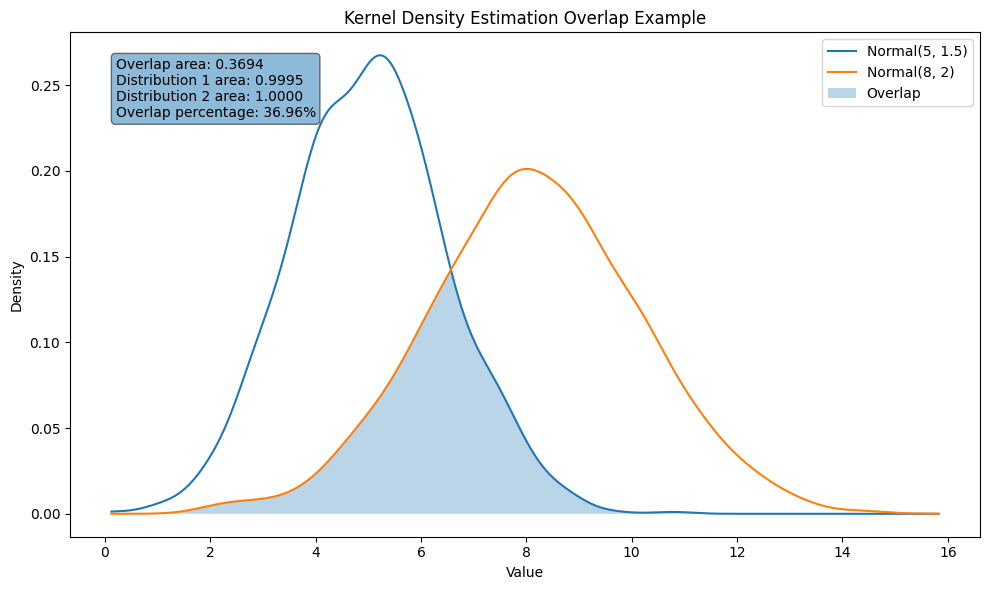

Overlap area: 0.3694
Overlap percentage: 36.96%


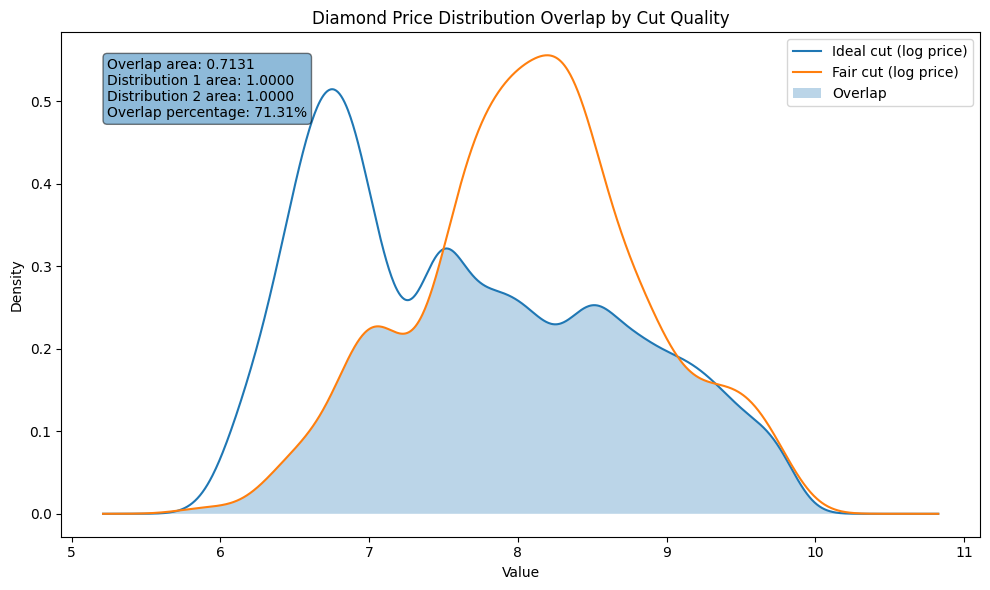


Diamond dataset example:
Overlap area between Ideal and Fair cut log prices: 0.7131
Overlap percentage: 71.31%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def calculate_kde_overlap(sample1, sample2, bw_method=None, x_min=None, x_max=None, num_points=1000):
    """
    Calculate the overlapping area between two distributions using KDE.
    
    Parameters:
    -----------
    sample1, sample2 : array-like
        Sample data from the two distributions
    bw_method : str, scalar or callable, optional
        The method used to calculate the bandwidth, passed to scipy.stats.gaussian_kde
    x_min, x_max : float, optional
        The range over which to evaluate the KDEs. If None, determined from data.
    num_points : int, optional
        Number of points at which to evaluate the KDEs
        
    Returns:
    --------
    overlap : float
        The overlapping area between the two KDEs
    kde1_area, kde2_area : float
        The total areas under each KDE curve
    kde1, kde2 : scipy.stats.gaussian_kde objects
        The KDE objects for each distribution
    x : array
        The points at which the KDEs were evaluated
    """
    # Create the KDE objects
    kde1 = stats.gaussian_kde(sample1, bw_method=bw_method)
    kde2 = stats.gaussian_kde(sample2, bw_method=bw_method)
    
    # Determine the range to evaluate the KDEs
    if x_min is None:
        x_min = min(np.min(sample1), np.min(sample2))
        x_min = x_min - 0.1 * abs(x_min)  # Add some padding
    
    if x_max is None:
        x_max = max(np.max(sample1), np.max(sample2))
        x_max = x_max + 0.1 * abs(x_max)  # Add some padding
    
    # Create the evaluation points
    x = np.linspace(x_min, x_max, num_points)
    
    # Evaluate the KDEs at these points
    kde1_values = kde1(x)
    kde2_values = kde2(x)
    
    # Calculate the step size for numerical integration
    step = (x_max - x_min) / (num_points - 1)
    
    # Calculate the overlap by numerical integration of min(kde1, kde2)
    overlap_values = np.minimum(kde1_values, kde2_values)
    overlap = np.sum(overlap_values) * step
    
    # Calculate total areas (should be close to 1 for proper PDFs)
    kde1_area = np.sum(kde1_values) * step
    kde2_area = np.sum(kde2_values) * step
    
    return overlap, kde1_area, kde2_area, kde1, kde2, x

def plot_kde_overlap(sample1, sample2, labels=None, title=None, figsize=(10, 6), bw_method=None):
    """
    Plot two KDEs and their overlap, and return the overlap statistics.
    
    Parameters:
    -----------
    sample1, sample2 : array-like
        Sample data from the two distributions
    labels : list of str, optional
        Labels for the two distributions
    title : str, optional
        Title for the plot
    figsize : tuple, optional
        Figure size
    bw_method : str, scalar or callable, optional
        The method used to calculate the bandwidth
        
    Returns:
    --------
    overlap : float
        The overlapping area between the two KDEs
    overlap_percentage : float
        The overlap as a percentage of the smaller distribution area
    """
    if labels is None:
        labels = ['Distribution 1', 'Distribution 2']
    
    overlap, kde1_area, kde2_area, kde1, kde2, x = calculate_kde_overlap(
        sample1, sample2, bw_method=bw_method
    )
    
    # Calculate the overlap as a percentage of the smaller distribution
    overlap_percentage = (overlap / min(kde1_area, kde2_area)) * 100
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot the KDEs
    kde1_values = kde1(x)
    kde2_values = kde2(x)
    overlap_values = np.minimum(kde1_values, kde2_values)
    
    ax.plot(x, kde1_values, label=labels[0])
    ax.plot(x, kde2_values, label=labels[1])
    ax.fill_between(x, 0, overlap_values, alpha=0.3, label='Overlap')
    
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    if title:
        ax.set_title(title)
    else:
        ax.set_title(f'KDE Overlap: {overlap:.4f} ({overlap_percentage:.2f}%)')
    
    ax.legend()
    
    # Add a text box with the overlap statistics
    textstr = (
        f'Overlap area: {overlap:.4f}\n'
        f'Distribution 1 area: {kde1_area:.4f}\n'
        f'Distribution 2 area: {kde2_area:.4f}\n'
        f'Overlap percentage: {overlap_percentage:.2f}%'
    )
    props = dict(boxstyle='round', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.show()
    
    return overlap, overlap_percentage

# Example usage
if __name__ == "__main__":
    # Generate some sample data
    np.random.seed(42)
    sample1 = np.random.normal(loc=5, scale=1.5, size=1000)
    sample2 = np.random.normal(loc=8, scale=2, size=1000)
    
    # Plot and calculate overlap
    overlap, overlap_percentage = plot_kde_overlap(
        sample1, sample2, 
        labels=['Normal(5, 1.5)', 'Normal(8, 2)'],
        title='Kernel Density Estimation Overlap Example'
    )
    
    print(f"Overlap area: {overlap:.4f}")
    print(f"Overlap percentage: {overlap_percentage:.2f}%")
    
    # Example with real data using seaborn datasets
    try:
        import seaborn as sns
        diamonds = sns.load_dataset('diamonds')
        
        # Compare price distributions for different diamond cuts
        ideal = diamonds[diamonds['cut'] == 'Ideal']['price']
        fair = diamonds[diamonds['cut'] == 'Fair']['price']
        
        # Log transform to handle the skewed price distribution
        ideal_log = np.log1p(ideal)
        fair_log = np.log1p(fair)
        
        overlap, overlap_percentage = plot_kde_overlap(
            ideal_log, fair_log,
            labels=['Ideal cut (log price)', 'Fair cut (log price)'],
            title='Diamond Price Distribution Overlap by Cut Quality'
        )
        
        print(f"\nDiamond dataset example:")
        print(f"Overlap area between Ideal and Fair cut log prices: {overlap:.4f}")
        print(f"Overlap percentage: {overlap_percentage:.2f}%")
    except:
        print("Seaborn diamond dataset example couldn't be loaded")

In [1]:
from evoscaper.utils.simulation import setup_model, make_rates, prep_sim, sim, prep_cfg
from synbio_morpher.utils.data.data_format_tools.common import load_json_as_dict, write_json
from synbio_morpher.utils.results.analytics.naming import get_true_interaction_cols
from evoscaper.utils.math import make_batch_symmetrical_matrices, make_sequence_from_symmetrical
import pandas as pd
import numpy as np
import seaborn as sns

fn = f'./data/simulate_circuits/2025_02_11__13_56_51/tabulated_mutation_info.json'
data = pd.read_json(fn)
x_type = 'energies'
config_bio = load_json_as_dict(f'./data/simulate_circuits/2025_02_11__13_56_51/config.json')


xla_bridge.py:backends():900: Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA INFO
xla_bridge.py:backends():900: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory INFO


<Axes: ylabel='Count'>

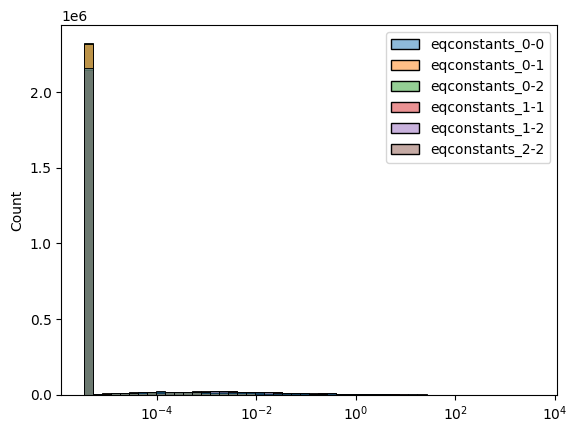

In [ ]:
input_species = data[data['sample_name'].notna()]['sample_name'].unique()
num_species = len(input_species)
fake_circuits = data[get_true_interaction_cols(data, 'energies', remove_symmetrical=True)].values

fake_circuits_reshaped = make_batch_symmetrical_matrices(
    fake_circuits.reshape(-1, fake_circuits.shape[-1]), side_length=len(input_species))

model_brn, qreactions, ordered_species, postprocs = setup_model(
    fake_circuits_reshaped, config_bio, input_species, x_type)

if x_type == 'energies':
    eqconstants, (forward_rates, reverse_rates) = postprocs[x_type](
        fake_circuits_reshaped)
elif x_type == 'eqconstants':
    forward_rates, reverse_rates = postprocs[x_type](
        fake_circuits_reshaped)
elif x_type == 'binding_rates_dissociation':
    # reverse_rates = fake_circuits_reshaped
    # eqconstants = forward_rates[0, 0, 0] / reverse_rates
    forward_rates, reverse_rates = postprocs[x_type](
        fake_circuits_reshaped)
    
eqconstants_flat = make_sequence_from_symmetrical(eqconstants, num_species)
reverse_rates_flat = make_sequence_from_symmetrical(reverse_rates, num_species)

num_species = len(input_species)
a = np.triu(np.ones((num_species, num_species)))
names_eq = list(map(lambda i: 'eqconstants' + '_' + str(i[0]) + '-' + str(i[1]), np.array(np.where(a > 0)).T))
names_rt = list(map(lambda i: 'binding_rates_dissociation' + '_' + str(i[0]) + '-' + str(i[1]), np.array(np.where(a > 0)).T))
    
data[names_eq] = eqconstants_flat
data[names_rt] = reverse_rates_flat

sns.histplot(data[names_eq], bins=50, log_scale=[False, True])

In [ ]:
# write_json(data, fn)